<a href="https://colab.research.google.com/github/AnasAkenoun/Energy_bands_Diamond-structure/blob/main/Energy_bands_Si.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.13575


<ipython-input-6-d6fd6612ab7d>:59: ComplexWarning: Casting complex values to real discards the imaginary part
  E_array[:,i]=np.sort(eigenvalues)


[[ 0.        +0.j          6.51329759-0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +3.51901621j
   0.        +0.j          0.        +0.j        ]
 [ 6.51329759+0.j          0.        +0.j          0.        +3.51901621j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.        -3.51901621j  7.2       +0.j
   0.        +0.j          0.        +0.j         -2.53962526+0.j
   0.        +0.j          0.        +0.j        ]
 [ 0.        +0.j         -0.        +0.j          0.        +0.j
   7.2       +0.j          0.        +0.j          0.        +0.j
  -2.53962526+0.j          0.        +4.4945258j ]
 [ 0.        +0.j         -0.        +0.j          0.        +0.j
   0.        +0.j          7.2       +0.j          0.        +0.j
   0.        +4.4945258j  -2.53962526+0.j        ]
 [ 0.        -3.51901621j  0.        +0.j         -2.53962526-0.j
   

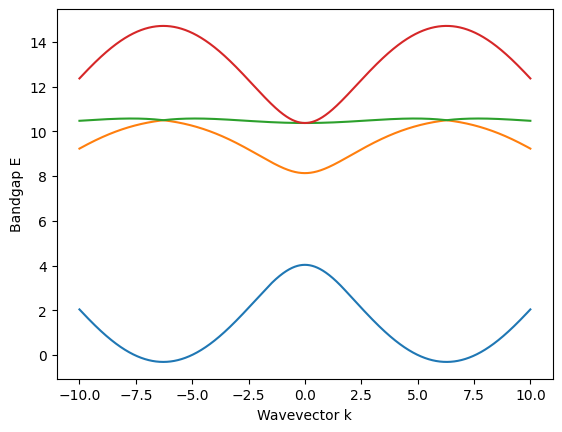

In [6]:
###################   Energy bands of Si crystal   ####################
import numpy as np
from scipy.sparse.linalg import eigs

import math

a =  0.543 # in A
print(a/4)
# Define the different spacing d, for neighbors

d1 = np.multiply([1,1,1],(1/4))
d2 = np.multiply([1,-1,-1],(1/4))
d3 = np.multiply([-1,1,-1],(1/4))
d4 = np.multiply([-1,-1,1],(1/4))

# Define the wavevectors k1,k2,k3 and k

k_min = -10
#k_max = (1/4)*(2*math.pi/a)
k_max = 10

nk = 100000
k_array = np.linspace(k_min, k_max, nk)
E_array = np.zeros((8,nk))



# Defining the potentials and the energies

Vss=-8.13; Vsp=5.88 ; Vxx=3.17; Vxy=7.51


Es_Ek = 0
Ep_Es = 7.20
Ep_Ek = Ep_Es

# Constructing the matrix M for each value of  and diagonalizing it

for i in range(nk):
    k = [k_array[i],0,0]
    #print(k)
    g1 = (1/4)*(np.exp(1j*(np.dot(d1,k)))+np.exp(1j*(np.dot(d2,k)))+np.exp(1j*(np.dot(d3,k)))+np.exp(1j*(np.dot(d4,k))))
    g2 = (1/4)*(np.exp(1j*(np.dot(d1,k)))+np.exp(1j*(np.dot(d2,k)))-np.exp(1j*(np.dot(d3,k)))-np.exp(1j*(np.dot(d4,k))))
    g3 = (1/4)*(np.exp(1j*(np.dot(d1,k)))-np.exp(1j*(np.dot(d2,k)))+np.exp(1j*(np.dot(d3,k)))-np.exp(1j*(np.dot(d4,k))))
    g4 = (1/4)*(np.exp(1j*(np.dot(d1,k)))-np.exp(1j*(np.dot(d2,k)))-np.exp(1j*(np.dot(d3,k)))+np.exp(1j*(np.dot(d4,k))))
    #print((np.dot(d1,k)))
    S1 = np.array([Es_Ek,Vss*g1,0,0,0,Vsp*g2,Vsp*g3,Vsp*g4])
    S2 = np.array([Vss*np.conjugate(g1),Es_Ek,-Vsp*np.conjugate(g2),-Vsp*np.conjugate(g3),-Vsp*np.conjugate(g4),0,0,0])
    X1 = np.array([0,-Vsp*g2,Ep_Ek,0,0,Vxx*g1,Vxy*g4,Vxy*g3])
    Y1 = np.array([0,-Vsp*g3,0,Ep_Ek,0,Vxy*g4,Vxx*g1,Vxy*g2])
    Z1 = np.array([0,-Vsp*g4,0,0,Ep_Ek,Vxy*g3,Vxy*g2,Vxx*g1])
    X2 = np.array([Vsp*np.conjugate(g2),0,Vxx*np.conjugate(g1),Vxy*np.conjugate(g4),Vxy*np.conjugate(g3),Ep_Ek,0,0])
    Y2 = np.array([Vsp*np.conjugate(g3),0,Vxy*np.conjugate(g4),Vxx*np.conjugate(g1),Vxy*np.conjugate(g2),0,Ep_Ek,0])
    Z2 = np.array([Vsp*np.conjugate(g4),0,Vxy*np.conjugate(g3),Vxy*np.conjugate(g2),Vxx*np.conjugate(g1),0,0,Ep_Ek])

    M = np.array([S1, S2, X1, Y1, Z1, X2, Y2, Z2], dtype='complex_')
    eigenvalues, eigenvectors = np.linalg.eig(M)
    #print(eigenvalues)
    E_array[:,i]=np.sort(eigenvalues)

print(M)


print(eigenvectors[3,:])

# Plotting the bandgap E vs k

import matplotlib.pyplot as plt


plt.plot(k_array, E_array[3,:])
plt.plot(k_array, E_array[4,:])
plt.plot(k_array, E_array[5,:])
plt.plot(k_array, E_array[6,:])

plt.xlabel('Wavevector k')
plt.ylabel('Bandgap E')
plt.show()


#M*PSI ((8,8)*(8,8))= E (8,i)* PSI (8,8)